In [1]:
import glob
import os
import sys
import platform
import requests
import batanalysis as ba
import matplotlib.pyplot as plt
import numpy as np
from astropy.time import Time, TimeDelta
from astropy.io import fits
from pathlib import Path
import swiftbat.swutil as sbu
import swiftbat
plt.ion()

ba.datadir("/home/idies/workspace/Temporary/ashleyh12/scratch/grb080319B")



PosixPath('/home/idies/workspace/Temporary/ashleyh12/scratch/grb080319B')

In [2]:
# incat=ba.create_custom_catalog('GRB080319B', 217.919, 36.300, 62.54, 66.88)
# incat=Path("./custom_catalog.cat")


In [3]:
object_name = "GRB080319B"
object_location = swiftbat.simbadlocation(object_name)
object_batsource = swiftbat.source(
    ra=object_location[0], dec=object_location[1], name=object_name
)
print(object_location)

(217.921, 36.30255555555555)


In [4]:
#automating the grb name format using astropy
## CONVERTING THE GRB NAME TO A MONTH-YEAR-DAY FORMAT
from astropy.time import Time

def grb_date(grb_name):
    year = "20" + grb_name[3:5]  # converting the grb name to years
    month = grb_name[5:7] # converting the name to months via indexing
    day = grb_name[7:9]  # converting it to days 

    date_format = f"{year}-{month}-{day}" # setting up the string format
    time = Time(date_format, format='iso') # using the Astropy Time object and passing the date string into it
    return time
    
grb_name = "GRB080319B"
grb_time = grb_date(grb_name) # storing the result of time format from above function
last_day = grb_time + 7 # adding a week to the above time 
print(f"{str(grb_time)} .. {str(last_day)}")

2008-03-19 00:00:00.000 .. 2008-03-26 00:00:00.000


In [5]:
query_args = dict(Start_Time=str(grb_date(grb_name)), fields='All', resultmax=0)
table_everything = ba.from_heasarc(**query_args)
minexposure = 1000     # cm^2 after cos adjust
source_name="GRB080319B"
object_name='GRB080319B'
object_batsource = swiftbat.source(ra=217.919, dec=36.300, name=object_name)

# calculate the exposure with partial coding
exposures = np.array([object_batsource.exposure(ra=row['RA'], dec=row['DEC'], roll=row['ROLL_ANGLE'])[0] for row in table_everything])

# select the observations that have greater than the minimum desired exposure
table_exposed = table_everything[exposures > minexposure]
print(f"Finding everything finds {len(table_everything)} observations, of which {len(table_exposed)} have more than {minexposure:0} cm^2 coded")

print(np.sort(table_exposed["START_TIME"]))

Finding everything finds 70 observations, of which 12 have more than 1000 cm^2 coded
   START_TIME   
      mjd       
----------------
 54544.115787037
54543.1062615741
54543.1125115741
54543.1930671296
54544.0493055556
54544.2289814815
54544.2535300926
54544.5069675926
54544.5814699074
54544.6462962963
54544.7822453704
54544.8537268518


In [6]:
# get a list of the fully downloaded observation IDs
result = ba.download_swiftdata(table_exposed)

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: SWIFT_TLE_ARCHIVE.txt.15258.21519855.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00031155006pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00031155006pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00031155006pob.cat.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00031155006ppr.par.gz exists and not ov

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00306757000pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00306757000pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00306757000pob.cat.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00306757000ppr.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00306757000s.mkf.gz exists and not overwritten (set clo

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00306757001pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00306757001pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00306757001pob.cat.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00306757001ppr.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00306757001s.mkf.gz exists and not overwritten (set clo

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00306757002pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00306757002pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00306757002pob.cat.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00306757002ppr.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00306757002s.mkf.gz exists and not overwritten (set clo

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00306778000pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00306778000pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00306778000pob.cat.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00306778000ppr.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00306778000s.mkf.gz exists and not overwritten (set clo

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00055350018pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00055350018pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00055350018pob.cat.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00055350018ppr.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00055350018s.mkf.gz exists and not overwritten (set clo

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00305288008pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00305288008pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00305288008pob.cat.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00305288008ppr.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00305288008s.mkf.gz exists and not overwritten (set clo

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00306754001pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00306754001pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00306754001pob.cat.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00306754001ppr.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00306754001s.mkf.gz exists and not overwritten (set clo

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00305288007pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00305288007pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00305288007pob.cat.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00305288007ppr.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00305288007s.mkf.gz exists and not overwritten (set clo

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00306754000pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00306754000pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00306754000pob.cat.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00306754000ppr.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00306754000s.mkf.gz exists and not overwritten (set clo

In [7]:
final_obs_ids = [i for i in table_exposed['OBSID'] if result[i]['success']]
print(len(final_obs_ids))

11


In [8]:
from astropy.coordinates import SkyCoord
object_name="GRB080319B"
object_location = swiftbat.simbadlocation(object_name)
c=SkyCoord(ra=object_location[0], dec=object_location[1], unit="deg", frame="icrs")
incat=ba.create_custom_catalog(object_name, c.ra.value, c.dec.value, c.galactic.l.value, c.galactic.b.value, catalog_dir=ba.datadir())
# incat=ba.create_custom_catalog(object_name, 217.919, 36.300, 62.54, 66.88)
dir_path = "/home/idies/workspace/Temporary/ashleyh12/scratch/grb080319B/"
incat = Path(f"{ba.datadir(dir_path)}/custom_catalog.cat")
print(incat)

/home/idies/workspace/Temporary/ashleyh12/scratch/grb080319B/custom_catalog.cat


In [ ]:
# run batsurvey in parallel
input_dict=dict(cleansnr=6,cleanexpr='ALWAYS_CLEAN==T', incatalog=f"{incat}", detthresh=9000, detthresh2=9000)
noise_map_dir = Path("/home/idies/workspace/Temporary/tmpataki/scratch/PATTERN_MAPS/")
batsurvey_obs=ba.parallel.batsurvey_analysis(final_obs_ids,  input_dict=input_dict, patt_noise_dir=noise_map_dir,  nprocs=10, recalc=True)



In [10]:
# batsurvey_obs=ba.parallel.batsurvey_analysis(final_obs_ids,  input_dict=input_dict, patt_noise_dir=map_dir)

In [11]:
# batsurvey_obs=ba.parallel.batspectrum_analysis(batsurvey_obs, object_name, fit_iterations=1000)

batsurvey_obs = ba.parallel.batspectrum_analysis(
    batsurvey_obs, object_name, use_cstat=False, ul_pl_index=2, nprocs=6
)

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080790114.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -9.098e-04 +/- 3.932e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1484 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080790114.rsp for Source 1


Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared         

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080790427.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -1.796e-04 +/- 7.254e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 404 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080790427.rsp for Source 1


Fit statistic  : Chi-Squared                   10.64     using 8 bins.

Test statistic : Chi-Squared                   10.64     using 8 bins.
 Null hypothesis probability of 1.00e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   pow

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080791731.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.256e-03 +/- 5.850e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 681 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080791731.rsp for Source 1


Fit statistic  : Chi-Squared                    8.00     using 8 bins.

Test statistic : Chi-Squared                    8.00     using 8 bins.
 Null hypothesis probability of 2.38e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powe

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080792207.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -1.856e-04 +/- 4.728e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1365 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080792207.rsp for Source 1


Fit statistic  : Chi-Squared                   29.46     using 8 bins.

Test statistic : Chi-Squared                   29.46     using 8 bins.
 Null hypothesis probability of 4.99e-05 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   po

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.
***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080792344.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.668e-04 +/- 6.092e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 570 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080792344.rsp for Source 1


Fit statistic  : Chi-Squared                    9.23     using 8 bins.

Test statistic : Chi-Squared                    9.23     using 8 bins.
 Null hypothesis probability of 1.61e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powe

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.


*** Parameter 1 is not a variable model parameter and no confidence range will be calculated.
 Parameter   Confidence Range (2.706)
*** Parameter 2 is not a variable model parameter and no confidence range will be calculated.
 Parameter   Confidence Range (2.706)
 Parameter   Confidence Range (2.706)
***Warning: Parameter pegged at hard limit: -100
                                   Parameters
Chi-Squared  |beta|/N    Lvl    3:lg10Flux    4:PhoIndex
8.92498      0.0102797     0      -9.61863       1.44927
 Variances and Principal Axes
                 3        4  
 6.1082E-01|  0.9815   0.1914  
 1.1491E+01| -0.1914   0.9815  
------------------------------

  Covariance Matrix
        1           2   
   1.009e+00  -2.044e+00
  -2.044e+00   1.109e+01
------------------------

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      14.0000      frozen
   2    1   cflux      Emax       ke

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080790628.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.054e-03 +/- 5.683e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 799 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080790628.rsp for Source 1


Fit statistic  : Chi-Squared                72816.05     using 8 bins.

Test statistic : Chi-Squared                72816.05     using 8 bins.
 Null hypothesis probability of 0.00e+00 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powe

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080780616.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -1.091e-04 +/- 3.347e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 739 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080780616.rsp for Source 1


Fit statistic  : Chi-Squared                    7.91     using 8 bins.

Test statistic : Chi-Squared                    7.91     using 8 bins.
 Null hypothesis probability of 2.44e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   pow

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080790734.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  7.619e-04 +/- 2.082e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 2100 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080790734.rsp for Source 1


Fit statistic  : Chi-Squared                  246.70     using 8 bins.

Test statistic : Chi-Squared                  246.70     using 8 bins.
 Null hypothesis probability of 2.08e-50 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   pow

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080781242.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -1.006e-03 +/- 3.629e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 679 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080781242.rsp for Source 1


Fit statistic  : Chi-Squared                    9.84     using 8 bins.

Test statistic : Chi-Squared                    9.84     using 8 bins.
 Null hypothesis probability of 1.32e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   pow

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.
***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080781418.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  7.850e-04 +/- 3.281e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 739 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080781418.rsp for Source 1


Fit statistic  : Chi-Squared                   12.18     using 8 bins.

Test statistic : Chi-Squared                   12.18     using 8 bins.
 Null hypothesis probability of 5.81e-02 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powe

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080791047.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  6.393e-05 +/- 2.020e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 2400 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080791047.rsp for Source 1


Fit statistic  : Chi-Squared                    9.32     using 8 bins.

Test statistic : Chi-Squared                    9.32     using 8 bins.
 Null hypothesis probability of 1.56e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   pow

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080782213.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -2.336e-04 +/- 4.727e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 300 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080782213.rsp for Source 1


Fit statistic  : Chi-Squared                    9.67     using 8 bins.

Test statistic : Chi-Squared                    9.67     using 8 bins.
 Null hypothesis probability of 1.39e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   pow

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080790114_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.115e-03 +/- 6.634e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1484 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080790114_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  208.70     using 8 bins.

Test statistic : Chi-Squared                  208.70     using 8 bins.
 Null hypothesis probability of 2.66e-42 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                   29.27     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  208.70     using

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080790734_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.685e-03 +/- 3.460e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 2100 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080790734_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  186.39     using 8 bins.

Test statistic : Chi-Squared                  186.39     using 8 bins.
 Null hypothesis probability of 1.49e-37 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                   25.23     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  186.39     using

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080780440_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.384e-03 +/- 5.242e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 679 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080780440_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  238.89     using 8 bins.

Test statistic : Chi-Squared                  238.89     using 8 bins.
 Null hypothesis probability of 9.69e-49 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                   56.85     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  238.89     using 

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080790427_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  9.493e-03 +/- 1.193e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 404 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080790427_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    3.03     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   76.11     using 8 bins.
 Null hypothesis probability of 8.53e-14 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    3.03     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statisti

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080790911_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.495e-03 +/- 3.271e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 2100 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080790911_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    2.73     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   50.87     using 8 bins.
 Null hypothesis probability of 9.76e-09 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    2.73     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statist

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080780616_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.114e-03 +/- 4.924e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 739 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080780616_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    1.62     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   45.37     using 8 bins.
 Null hypothesis probability of 1.16e-07 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    1.62     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statisti

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080791731_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  7.815e-03 +/- 9.832e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 681 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080791731_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    3.20     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   66.70     using 8 bins.
 Null hypothesis probability of 6.84e-12 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    3.20     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statisti

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080791047_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.547e-03 +/- 3.189e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 2400 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080791047_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    3.38     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   43.02     using 8 bins.
 Null hypothesis probability of 3.31e-07 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    3.38     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statist

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080781242_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.384e-03 +/- 5.353e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 679 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080781242_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    1.64     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   44.26     using 8 bins.
 Null hypothesis probability of 1.90e-07 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    1.64     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statisti

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080792207_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.319e-03 +/- 6.883e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1365 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080792207_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    4.23     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  100.18     using 8 bins.
 Null hypothesis probability of 9.91e-19 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    4.23     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statist

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080781418_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.372e-03 +/- 5.209e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 739 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080781418_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    1.91     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   46.87     using 8 bins.
 Null hypothesis probability of 5.91e-08 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    1.91     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statisti

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080792344_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  7.841e-03 +/- 9.959e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 570 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080792344_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    2.49     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   54.81     using 8 bins.
 Null hypothesis probability of 1.63e-09 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    2.49     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statisti

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080782213_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  6.410e-03 +/- 7.471e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 300 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080782213_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    1.29     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   62.23     using 8 bins.
 Null hypothesis probability of 5.41e-11 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    1.29     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statisti

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080791533.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.752e-05 +/- 1.864e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 2629 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080791533.rsp for Source 1


Fit statistic  : C-Statistic                   11.16     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  255.15     using 8 bins.
 Null hypothesis probability of 2.22e-51 with 7 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs   

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080780236.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -2.008e-03 +/- 8.235e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 418 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080780236.rsp for Source 1


Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared          

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080780413.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -6.322e-04 +/- 8.082e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 359 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080780413.rsp for Source 1


Fit statistic  : Chi-Squared                    8.47     using 8 bins.

Test statistic : Chi-Squared                    8.47     using 8 bins.
 Null hypothesis probability of 2.05e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   pow

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080780549.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.994e-03 +/- 8.480e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 359 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080780549.rsp for Source 1


Fit statistic  : Chi-Squared                    6.76     using 8 bins.

Test statistic : Chi-Squared                    6.76     using 8 bins.
 Null hypothesis probability of 3.44e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powe

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080780726.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.912e-04 +/- 7.743e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 359 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080780726.rsp for Source 1


Fit statistic  : Chi-Squared                   20.46     using 8 bins.

Test statistic : Chi-Squared                   20.46     using 8 bins.
 Null hypothesis probability of 2.30e-03 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powe

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080781038.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  8.352e-04 +/- 7.392e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 382 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080781038.rsp for Source 1


Fit statistic  : Chi-Squared                    2.56     using 8 bins.

Test statistic : Chi-Squared                    2.56     using 8 bins.
 Null hypothesis probability of 8.62e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powe

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080781528.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  8.928e-04 +/- 8.774e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 353 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080781528.rsp for Source 1


Fit statistic  : Chi-Squared                    3.99     using 8 bins.

Test statistic : Chi-Squared                    3.99     using 8 bins.
 Null hypothesis probability of 6.78e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powe

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080781704.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.374e-04 +/- 9.260e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 356 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080781704.rsp for Source 1


Fit statistic  : Chi-Squared                    5.66     using 8 bins.

Test statistic : Chi-Squared                    5.66     using 8 bins.
 Null hypothesis probability of 4.62e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powe

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080781840.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -8.016e-04 +/- 8.193e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 413 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080781840.rsp for Source 1


Fit statistic  : Chi-Squared                   18.78     using 8 bins.

Test statistic : Chi-Squared                   18.78     using 8 bins.
 Null hypothesis probability of 4.56e-03 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   pow

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080791533_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.472e-03 +/- 3.082e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 2629 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080791533_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  238.89     using 8 bins.

Test statistic : Chi-Squared                  238.89     using 8 bins.
 Null hypothesis probability of 9.69e-49 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                  134.17     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  238.89     using

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080791400.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.459e-04 +/- 1.769e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 2619 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080791400.rsp for Source 1


Fit statistic  : C-Statistic                   43.81     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                 2920.98     using 8 bins.
 Null hypothesis probability of 0.00e+00 with 7 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs   

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080780236_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.014e-02 +/- 1.198e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 418 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080780236_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  238.89     using 8 bins.

Test statistic : Chi-Squared                  238.89     using 8 bins.
 Null hypothesis probability of 9.69e-49 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                   83.92     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  238.89     using 

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080791849.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.809e-04 +/- 1.747e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 2619 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080791849.rsp for Source 1


Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared          

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080800313.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -5.787e-04 +/- 2.338e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1261 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080800313.rsp for Source 1


Fit statistic  : Chi-Squared                   24.56     using 8 bins.

Test statistic : Chi-Squared                   24.56     using 8 bins.
 Null hypothesis probability of 4.12e-04 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   po

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/batanalysis/bat_survey.py:1019: UserWarning: Observation ID: 00306778000 Pointing ID: 20080791211 
There is no source GRB080319B found in the catalog file. Please double check the spelling.
This source may also not be detected in this observation ID/pointing ID


*** Parameter 1 is not a variable model parameter and no confidence range will be calculated.
Cannot do error calc: Reduced Chi^2 (= 2.70937) > maximum (2)


***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080800502.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -3.187e-04 +/- 3.907e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 454 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080800502.rsp for Source 1


Fit statistic  : Chi-Squared                    3.77     using 8 bins.

Test statistic : Chi-Squared                    3.77     using 8 bins.
 Null hypothesis probability of 7.08e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   pow

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080801251.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  6.542e-04 +/- 5.254e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 241 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080801251.rsp for Source 1


Fit statistic  : Chi-Squared                    6.62     using 8 bins.

Test statistic : Chi-Squared                    6.62     using 8 bins.
 Null hypothesis probability of 3.58e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powe

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080801428.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -2.118e-04 +/- 2.690e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1200 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080801428.rsp for Source 1


Fit statistic  : Chi-Squared                   19.41     using 8 bins.

Test statistic : Chi-Squared                   19.41     using 8 bins.
 Null hypothesis probability of 3.53e-03 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   po

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080801740.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.738e-04 +/- 3.174e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 839 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080801740.rsp for Source 1


Fit statistic  : Chi-Squared                    3.96     using 8 bins.

Test statistic : Chi-Squared                    3.96     using 8 bins.
 Null hypothesis probability of 6.82e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powe

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080801917.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.741e-04 +/- 2.716e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1021 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080801917.rsp for Source 1


Fit statistic  : Chi-Squared                    5.64     using 8 bins.

Test statistic : Chi-Squared                    5.64     using 8 bins.
 Null hypothesis probability of 4.65e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   pow

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080802053.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.038e-04 +/- 2.718e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1020 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080802053.rsp for Source 1


Fit statistic  : Chi-Squared                    9.79     using 8 bins.

Test statistic : Chi-Squared                    9.79     using 8 bins.
 Null hypothesis probability of 1.34e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   pow

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080802230.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.557e-04 +/- 2.828e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 781 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080802230.rsp for Source 1


Fit statistic  : Chi-Squared                    4.81     using 8 bins.

Test statistic : Chi-Squared                    4.81     using 8 bins.
 Null hypothesis probability of 5.68e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powe

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080791400_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.424e-03 +/- 3.118e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 2619 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080791400_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  192.33     using 8 bins.

Test statistic : Chi-Squared                  192.33     using 8 bins.
 Null hypothesis probability of 8.12e-39 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                   30.20     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  192.33     using

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080780413_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.058e-02 +/- 1.249e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 359 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080780413_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    1.43     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   34.74     using 8 bins.
 Null hypothesis probability of 1.25e-05 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    1.43     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statisti

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080791230.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -2.279e-05 +/- 4.190e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 2070 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080791230.rsp for Source 1


Fit statistic  : C-Statistic                   22.34     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  244.81     using 8 bins.
 Null hypothesis probability of 3.52e-49 with 7 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs  

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080792032.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -2.483e-04 +/- 4.286e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1947 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080792032.rsp for Source 1


Fit statistic  : C-Statistic                    7.69     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   41.84     using 8 bins.
 Null hypothesis probability of 5.59e-07 with 7 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs  

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080791849_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.378e-03 +/- 3.005e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 2619 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080791849_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  158.02     using 8 bins.

Test statistic : Chi-Squared                  158.02     using 8 bins.
 Null hypothesis probability of 1.55e-31 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                   14.86     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  158.02     using

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080780549_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  9.960e-03 +/- 1.166e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 359 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080780549_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    1.43     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   36.43     using 8 bins.
 Null hypothesis probability of 6.00e-06 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    1.43     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statisti

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080791230_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.746e-03 +/- 7.236e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 2070 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080791230_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  234.80     using 8 bins.

Test statistic : Chi-Squared                  234.80     using 8 bins.
 Null hypothesis probability of 7.23e-48 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                   94.85     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  234.80     using

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080792032_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.873e-03 +/- 7.218e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1947 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080792032_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  238.89     using 8 bins.

Test statistic : Chi-Squared                  238.89     using 8 bins.
 Null hypothesis probability of 9.69e-49 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                  249.14     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  238.89     using

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080800313_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.022e-03 +/- 3.876e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1261 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080800313_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    2.18     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   51.77     using 8 bins.
 Null hypothesis probability of 6.48e-09 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    2.18     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statist

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080780726_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.041e-02 +/- 1.231e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 359 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080780726_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    1.37     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   34.44     using 8 bins.
 Null hypothesis probability of 1.42e-05 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    1.37     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statisti

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080800502_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.941e-03 +/- 5.861e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 454 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080800502_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    1.76     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   72.81     using 8 bins.
 Null hypothesis probability of 3.99e-13 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    1.76     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statisti

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/batanalysis/bat_survey.py:1019: UserWarning: Observation ID: 00306754000 Pointing ID: 20080790535 
There is no source GRB080319B found in the catalog file. Please double check the spelling.
This source may also not be detected in this observation ID/pointing ID
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/batanalysis/bat_survey.py:1019: UserWarning: Observation ID: 00306754000 Pointing ID: 20080790541 
There is no source GRB080319B found in the catalog file. Please double check the spelling.
This source may also not be detected in this observation ID/pointing ID
***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080781038_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  9.975e-03 +/- 1.215e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 382 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080781038_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    1.33     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   36.79     using 8 bins.
 Null hypothesis probability of 5.14e-06 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    1.33     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statisti

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080801251_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  7.026e-03 +/- 8.351e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 241 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080801251_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    1.19     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   62.23     using 8 bins.
 Null hypothesis probability of 5.41e-11 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    1.19     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statisti

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080790554.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -2.600e-04 +/- 3.554e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 630 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080790554.rsp for Source 1


Fit statistic  : C-Statistic                    2.54     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   70.87     using 8 bins.
 Null hypothesis probability of 9.84e-13 with 7 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs   

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080781528_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.189e-02 +/- 1.386e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 353 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080781528_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    2.45     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   43.57     using 8 bins.
 Null hypothesis probability of 2.59e-07 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    2.45     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statisti

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080801428_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.358e-03 +/- 4.134e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1200 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080801428_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    5.42     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  320.83     using 8 bins.
 Null hypothesis probability of 2.14e-65 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    5.42     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statist

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.
***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080781704_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.206e-02 +/- 1.388e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 356 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080781704_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    2.37     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   41.59     using 8 bins.
 Null hypothesis probability of 6.23e-07 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    2.37     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statisti

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080801740_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.981e-03 +/- 4.833e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 839 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080801740_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    2.21     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   49.68     using 8 bins.
 Null hypothesis probability of 1.67e-08 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    2.21     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statisti

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080781840_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.070e-02 +/- 1.254e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 413 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080781840_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    2.34     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   51.36     using 8 bins.
 Null hypothesis probability of 7.81e-09 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    2.34     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statisti

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080801917_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.469e-03 +/- 4.327e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1021 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080801917_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    2.28     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   56.58     using 8 bins.
 Null hypothesis probability of 7.23e-10 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    2.28     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statist

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080802053_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.427e-03 +/- 4.200e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1020 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080802053_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    1.93     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   46.21     using 8 bins.
 Null hypothesis probability of 7.95e-08 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    1.93     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statist

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080802230_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.797e-03 +/- 4.528e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 781 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080802230_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    1.68     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   48.13     using 8 bins.
 Null hypothesis probability of 3.36e-08 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    1.68     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statisti

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080780243.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.534e-04 +/- 4.469e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1146 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080780243.rsp for Source 1


Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared          

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080780419.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.405e-04 +/- 4.320e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1146 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080780419.rsp for Source 1


Fit statistic  : Chi-Squared                    5.69     using 8 bins.

Test statistic : Chi-Squared                    5.69     using 8 bins.
 Null hypothesis probability of 4.58e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   pow

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080780555.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.247e-04 +/- 4.731e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1146 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080780555.rsp for Source 1


Fit statistic  : Chi-Squared                    6.19     using 8 bins.

Test statistic : Chi-Squared                    6.19     using 8 bins.
 Null hypothesis probability of 4.02e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   pow

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080780732.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -8.442e-05 +/- 5.825e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 600 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080780732.rsp for Source 1


Fit statistic  : Chi-Squared                   10.24     using 8 bins.

Test statistic : Chi-Squared                   10.24     using 8 bins.
 Null hypothesis probability of 1.15e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   pow

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080780744.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -3.173e-04 +/- 8.036e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 300 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080780744.rsp for Source 1


Fit statistic  : Chi-Squared                    4.58     using 8 bins.

Test statistic : Chi-Squared                    4.58     using 8 bins.
 Null hypothesis probability of 5.99e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   pow

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080780910.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -1.633e-04 +/- 3.888e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1661 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080780910.rsp for Source 1


Fit statistic  : Chi-Squared                    6.47     using 8 bins.

Test statistic : Chi-Squared                    6.47     using 8 bins.
 Null hypothesis probability of 3.73e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   po

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080781045.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.030e-04 +/- 4.405e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1146 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080781045.rsp for Source 1


Fit statistic  : Chi-Squared                    8.83     using 8 bins.

Test statistic : Chi-Squared                    8.83     using 8 bins.
 Null hypothesis probability of 1.84e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   pow

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080781223.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.172e-04 +/- 4.800e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1061 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080781223.rsp for Source 1


Fit statistic  : Chi-Squared                    7.23     using 8 bins.

Test statistic : Chi-Squared                    7.23     using 8 bins.
 Null hypothesis probability of 3.00e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   pow

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080781359.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.274e-04 +/- 4.774e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1075 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080781359.rsp for Source 1


Fit statistic  : Chi-Squared                    4.28     using 8 bins.

Test statistic : Chi-Squared                    4.28     using 8 bins.
 Null hypothesis probability of 6.39e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   pow

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080781534.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -1.961e-04 +/- 4.310e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1746 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080781534.rsp for Source 1


Fit statistic  : Chi-Squared                    6.56     using 8 bins.

Test statistic : Chi-Squared                    6.56     using 8 bins.
 Null hypothesis probability of 3.64e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   po

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080781710.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.770e-04 +/- 4.253e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1746 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080781710.rsp for Source 1


Fit statistic  : Chi-Squared                    7.34     using 8 bins.

Test statistic : Chi-Squared                    7.34     using 8 bins.
 Null hypothesis probability of 2.91e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   pow

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080781847.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  7.898e-04 +/- 4.006e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1746 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080781847.rsp for Source 1


Fit statistic  : Chi-Squared                   10.95     using 8 bins.

Test statistic : Chi-Squared                   10.95     using 8 bins.
 Null hypothesis probability of 9.00e-02 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   pow

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080782026.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.926e-04 +/- 3.981e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1616 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080782026.rsp for Source 1


Fit statistic  : Chi-Squared                    4.58     using 8 bins.

Test statistic : Chi-Squared                    4.58     using 8 bins.
 Null hypothesis probability of 5.99e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   pow

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080782347.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -1.053e-03 +/- 5.751e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 600 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080782347.rsp for Source 1


Fit statistic  : Chi-Squared                   14.27     using 8 bins.

Test statistic : Chi-Squared                   14.27     using 8 bins.
 Null hypothesis probability of 2.67e-02 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   pow

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080780243_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.913e-03 +/- 7.813e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1146 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB080319B_survey_point_20080780243_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  238.89     using 8 bins.

Test statistic : Chi-Squared                  238.89     using 8 bins.
 Null hypothesis probability of 9.69e-49 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                  140.69     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  238.89     using

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080780419_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.836e-03 +/- 7.662e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1146 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080780419_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    2.88     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   39.61     using 8 bins.
 Null hypothesis probability of 1.50e-06 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    2.88     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statist

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080780555_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  6.167e-03 +/- 8.064e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1146 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080780555_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    3.15     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   41.37     using 8 bins.
 Null hypothesis probability of 6.86e-07 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    3.15     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statist

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080780732_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  7.822e-03 +/- 9.935e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 600 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080780732_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    2.28     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   44.21     using 8 bins.
 Null hypothesis probability of 1.95e-07 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    2.28     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statisti

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080780744_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.094e-02 +/- 1.307e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 300 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080780744_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    1.93     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   53.26     using 8 bins.
 Null hypothesis probability of 3.29e-09 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    1.93     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statisti

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080780910_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.221e-03 +/- 6.812e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1661 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080780910_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    9.80     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  340.41     using 8 bins.
 Null hypothesis probability of 1.39e-69 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    9.80     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statist

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080781045_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.737e-03 +/- 7.255e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1146 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080781045_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    3.00     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   39.46     using 8 bins.
 Null hypothesis probability of 1.60e-06 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    3.00     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statist

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080781223_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  6.071e-03 +/- 7.872e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1061 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080781223_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    2.79     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   38.97     using 8 bins.
 Null hypothesis probability of 1.98e-06 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    2.79     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statist

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080781359_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  6.190e-03 +/- 8.440e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1075 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080781359_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    3.29     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   43.30     using 8 bins.
 Null hypothesis probability of 2.92e-07 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    3.29     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statist

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080781534_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.579e-03 +/- 7.194e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1746 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080781534_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    5.20     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   45.53     using 8 bins.
 Null hypothesis probability of 1.08e-07 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    5.20     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statist

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080781710_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.226e-03 +/- 6.698e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1746 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080781710_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    5.13     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   49.15     using 8 bins.
 Null hypothesis probability of 2.12e-08 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    5.13     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statist

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080781847_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.346e-03 +/- 6.951e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1746 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080781847_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    4.99     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   41.75     using 8 bins.
 Null hypothesis probability of 5.80e-07 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    4.99     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statist

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080782026_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.114e-03 +/- 6.598e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1616 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080782026_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    4.13     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   43.49     using 8 bins.
 Null hypothesis probability of 2.68e-07 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    4.13     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statist

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080782347_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  7.697e-03 +/- 9.919e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 600 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080782347_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    2.71     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   57.10     using 8 bins.
 Null hypothesis probability of 5.71e-10 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    2.71     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statisti

In [16]:
ba.print_parameters(batsurvey_obs, source_name, values=['met_time', 'utc_time', 'exposure', 'flux', 'index'], latex_table=False, savetable=True, save_file="output.txt")

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


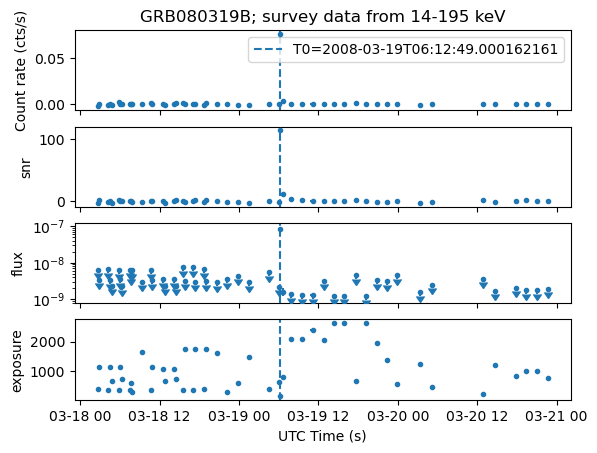

In [192]:
# fig, axes=ba.plot_survey_lc(batsurvey_obs, id_list=source_name, time_unit="UTC", values=["rate","snr", "flux", "exposure"], T0=306757, calc_lc=True) #T0 is GBM trigger time

fig, axes=ba.plot_survey_lc(batsurvey_obs, id_list=source_name, time_unit="UTC", values=["rate","snr", "flux", "exposure"], T0=227599971.654) #T0 is GBM trigger time

axes[1].set_yscale('log')
axes[0].set_yscale('log')


axes[1].axhline(5,0,1)
t=Time(['2008-03-19T00:00:00', '2008-03-19T23:00:00'], format='isot', scale='utc')
for ax in axes:
    # ax.set_xlim(Time(['2008-03-19', '2008-03-19T23:00:00'], format='isot', scale='utc'))
    ax.set_xlim(t.datetime64)

fig.savefig('grb080319_lightcurve.pdf')

In [14]:
#combine all the pointings into a single file to sort into binned fits files
outventory_file=ba.merge_outventory(batsurvey_obs)

In [172]:
# list of obs id with a snr > 7

all_data=ba.concatenate_data(batsurvey_obs, object_name, ["obs_id", "pointing_id", "exposure", "rate","rate_err", "snr", "flux", "PhoIndex"])
# print(all_data)
snr_obsid = []
high_snr_pointing = []
for x in range(len(all_data[object_name]["snr"])):
    if all_data[object_name]["snr"][x] > 7:
        snr_obsid.append(all_data[object_name]["obs_id"][x])
        high_snr_pointing.append(all_data[object_name]["pointing_id"][x])


print("SNR Values > 7: " , snr_obsid, "\n")
print(high_snr_pointing)
# print(snr_obsid)

# initialize batsurvey obj w/ the obs id
obs=ba.BatSurvey(obs_id='00306757000')

# retrieving pointing ids using obs
pointing_ids=obs.get_pointing_ids()
print(pointing_ids, "\n")
print(obs_id, "\n")

SNR Values > 7:  ['00306757000', '00306757000'] 

['20080790610', '20080790628']
['20080790610', '20080790628', '20080790734', '20080790911', '20080791047'] 

-2.73411364852987 



In [184]:
high_snr_pointing

['20080790610', '20080790628']

[PosixPath('/home/idies/workspace/Temporary/ashleyh12/scratch/grb080319B/00306757000_surveyresult/PHA_files/GRB080319B_survey_point_20080790610.pha'), PosixPath('/home/idies/workspace/Temporary/ashleyh12/scratch/grb080319B/00306757000_surveyresult/PHA_files/GRB080319B_survey_point_20080790628.pha')]

1 spectrum  in use
 
Spectral Data File: GRB080319B_survey_point_20080790610.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  7.581e-02 +/- 6.141e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 164 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB080319B_survey_point_20080790610.rsp for Source 1


Fit statistic  : C-Statistic                    0.06     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                    0.70     using 8 bins.
 Null hypothesis probability of 9.94e-01 with 6 degrees of freedom
 Current data and

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.


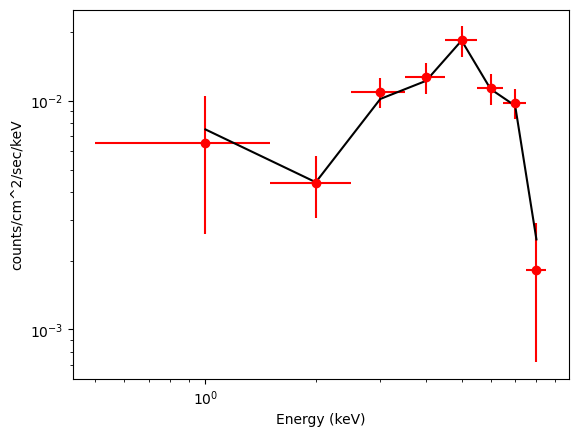

*** Parameter 1 is not a variable model parameter and no confidence range will be calculated.
 Parameter   Confidence Range (2.706)
*** Parameter 2 is not a variable model parameter and no confidence range will be calculated.
 Parameter   Confidence Range (2.706)
 Parameter   Confidence Range (2.706)
     3     -7.35311     -6.80662    (-0.286063,0.260426)
 Parameter   Confidence Range (2.706)
     4    -0.143077      1.37442    (-0.778888,0.738609)
*** Parameter 5 is not a variable model parameter and no confidence range will be calculated.
 Parameter   Confidence Range (2.706)
GRB080319B_survey_point_20080790610.xcm exists. Replace? (y/n) 

Exception: Error executing command: save

In [193]:
phafile = obs.get_pha_filenames(id_list=object_name, pointing_id_list=high_snr_pointing)
print(phafile)

for file in phafile: 
    ba.fit_spectrum(file, obs)




In [ ]:
# list of observation ids?
00031155006
00306757000
00306778000
00305288008
00306754001
00305288007
00306754000

In [ ]:
#bin into 1 day cadence
time_bins=ba.group_outventory(outventory_file, np.timedelta64(1, "D"), end_datetime=Time("2008-03-21"))

In [ ]:
#do the parallel construction of each mosaic for each time bin
time_bins=ba.group_outventory(outventory_file, np.timedelta64(1, "D"), end_datetime=Time("2008-03-21"))
mosaic_list, total_mosaic=ba.parallel.batmosaic_analysis(batsurvey_obs, outventory_file, time_bins, catalog_file=incat, nprocs=1)

In [ ]:
mosaic_list=ba.parallel.batspectrum_analysis(mosaic_list, source_name, fit_iterations=1000, nprocs=1)
total_mosaic =ba.parallel.batspectrum_analysis(total_mosaic, source_name, fit_iterations=1000, nprocs=1)

In [191]:
fig, axes=ba.plot_survey_lc(mosaic_list, id_list=source_name, time_unit="UTC", values=["rate","snr", "flux", "exposure"], T0=687014249.000, calc_lc=True) #T0 is GBM trigger time

axes[1].set_yscale('log')
axes[0].set_yscale('log')


axes[1].axhline(5,0,1)

ba.print_parameters(mosaic_list, source_name, values=['met_time', 'utc_time', 'exposure', 'flux', 'PhoIndex'], latex_table=False, savetable=True, save_file="output_mosaic.txt")

ba.print_parameters([total_mosaic], source_name, values=['met_time', 'utc_time', 'exposure', 'flux', 'PhoIndex'], latex_table=False, savetable=True, save_file="output_mosaic_total.txt")

energy_range=None
time_unit="MET"
values=["rate","snr", "flux", "PhoIndex"]

survey_obsid_list=["all_data_dictionary","monthly_mosaic_dictionary"]

# obs_list_count=0
for observation_list in survey_obsid_list:

    with open(observation_list+".pkl", 'rb') as f:
        all_data=pickle.load(f)
        data=all_data[object_name]

    # get the time centers and errors
    if "mosaic" in observation_list:

        if "MET" in time_unit:
            t0 = TimeDelta(data["user_timebin/met_time"], format='sec')
            tf = TimeDelta(data["user_timebin/met_stop_time"], format='sec')
        elif "MJD" in time_unit:
            t0 = Time(data[time_str_start], format='mjd')
            tf = Time(data[time_str_end], format='mjd')
        else:
            t0 = Time(data["user_timebin/utc_time"])
            tf = Time(data["user_timebin/utc_stop_time"])
    else:
        if "MET" in time_unit:
            t0 = TimeDelta(data["met_time"], format='sec')
        elif "MJD" in time_unit:
            t0 = Time(data[time_str_start], format='mjd')
        else:
            t0 = Time(data["utc_time"])
        tf = t0 + TimeDelta(data["exposure"], format='sec')

    dt = tf - t0

    if "MET" in time_unit:
        time_center = 0.5 * (tf + t0).value
        time_diff = 0.5 * (tf - t0).value
    elif "MJD" in time_unit:
        time_diff = 0.5 * (tf - t0)
        time_center = t0 + time_diff
        time_center = time_center.value
        time_diff = time_diff.value

    else:
        time_diff = TimeDelta(0.5 * dt)  # dt.to_value('datetime')
        time_center = t0 + time_diff

        time_center = np.array([i.to_value('datetime64') for i in time_center])
        time_diff = np.array([np.timedelta64(0.5 * i.to_datetime()) for i in dt])

    x = time_center
    xerr = time_diff

    if obs_list_count == 0:
        fig, axes = plt.subplots(len(values), sharex=True, figsize=(10,12))

    axes_queue = [i for i in range(len(values))]
    # plot_value=[i for i in values]

    e_range_str = f"{14}-{195} keV"
    #axes[0].set_title(object_name + '; survey data from ' + e_range_str)

    for i in values:
        ax = axes[axes_queue[0]]
        axes_queue.pop(0)

        y = data[i]
        yerr = np.zeros(x.size)
        y_upperlim = np.zeros(x.size)

        label = i

        if "rate" in i:
            yerr = data[i + "_err"]
            label = "Count rate (cts/s)"
        elif i + "_lolim" in data.keys():
            # get the errors
            lolim = data[i + "_lolim"]
            hilim = data[i + "_hilim"]

            yerr = np.array([lolim, hilim])
            y_upperlim = data[i + "_upperlim"]

            # find where we have upper limits and set the error to 1 since the nan error value isnt
            # compatible with upperlimits
            yerr[:, y_upperlim] = 0.1 * y[y_upperlim]

        if "mosaic" in observation_list:
            if "weekly" in observation_list:
                zorder = 9
                c = "blue"
                m = "o"
                l="Weekly Mosaic"
                ms=5
                a=0.8
            if "daily" in observation_list:
                zorder = 9
                c = "gray"
                m = "o"
                l="Daily Mosaic"
                ms=5
                a=0.8
            else:
                zorder = 9
                c='green'
                m = "s"
                l = "Monthly Mosaic"
                ms=7
                a = 1
        else:
            zorder = 4
            c = "r"
            m = "o"
            l = "Survey Snapshot"
            ms=3
            a = 1

        ax.errorbar(x, y, xerr=xerr, yerr=yerr, uplims=y_upperlim, linestyle="None", marker=m, markersize=ms,
                    zorder=zorder, color=c, label=l, alpha=a)

        if ("flux" in i.lower()):
            ax.set_yscale('log')

        if ("snr" in i.lower()):
            ax.set_yscale('log')

        ax.set_ylabel(label)

    # if T0==0:
    if "MET" in time_unit:
        label_string = 'MET Time (s)'
        plt.gca().ticklabel_format(useMathText=True)
    elif "MJD" in time_unit:
        label_string = 'MJD Time (s)'
    else:
        label_string = 'UTC Time (s)'

    axes[-1].set_xlabel(label_string)

    obs_list_count += 1

axes[0].set_yscale('log')
axes[1].set_yscale('log')
axes[1].axhline(7,0,1)


#add the UTC times as well
met_values=[687014249.000]#[i.get_position()[0] for i in axes[-1].get_xticklabels()]
utc_values=[np.datetime64(sbu.met2datetime(i)) for i in met_values]

if "MET" in time_unit:
    plot_val=met_values
elif "UTC" in time_unit:
    plot_val=utc_values

for i,j in zip(plot_val, ["19-03-08 06:12:49 UTC"]):
    for ax in axes:
        ax.axvline(i, 0, 1, ls='--', color='k')
        if ax==axes[0]:
            ax.text(i, ax.get_ylim()[1]*1.03, str(j), fontsize=12, ha='center')

axes[0].legend(loc="upper left")

axes[1].set_ylabel("SNR")
axes[2].set_ylabel(r"Flux (erg/s/cm$^2$)")
axes[3].set_ylabel(r"$\Gamma$")

for ax, l in zip(axes, ["a","b","c","d"]):
    ax.text(.99, .95, f"({l})", ha='right', va='top', transform=ax.transAxes,  fontsize=12)

#crab values for reference
axes[-1].axhline(2.15, 0, 1)
axes[-2].axhline(23342.70e-12, 0, 1)

fig.tight_layout()
plot_filename = object_name + '_survey_lc.pdf'
fig.savefig(plot_filename, bbox_inches="tight")

NameError: name 'mosaic_list' is not defined

In [ ]:
# import sys
# import platform

In [ ]:
# #run batsurvey in parallel
# input_dict=dict(cleansnr=6,cleanexpr='ALWAYS_CLEAN==T', incatalog=f"{incat}", detthresh=9000, detthresh2=9000)
# map_dir = Path("/home/idies/workspace/Temporary/tmpataki/scratch/PATTERN_MAPS/")
# obs=ba.BatSurvey(final_obs_ids[0],recalc=True,  input_dict=input_dict, patt_noise_dir=map_dir)

In [ ]:
# %debug